<a href="https://colab.research.google.com/github/21sinhae/horizondet/blob/main/image_find_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

 Reading the required image in
 which operations are to be done.
 Make sure that the image is in the same
 directory in which this python program is


In [ ]:
img = cv2.imread('event1.png')

For Regular HoughLines


In [ ]:
# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 75, 150, apertureSize=7)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)


For Probabilistic Hough Lines


In [ ]:
# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=7)

lines= cv2.HoughLinesP(edges, 1, np.pi / 180, 75, None, 120, 8);
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        #print(l[3],l[1])
        if l[3]-l[1]==0 :
            cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

For HoughLines

In [ ]:
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr

    if (theta > 1.5705 and theta < 1.571 and r > 100):
        #print(r,theta)
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a*r

        # y0 stores the value rsin(theta)
        y0 = b*r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1150*(-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1150*(a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1150*(-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1150*(a))

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the color of the line, 2 is line width
        # red
        if (r<150):
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            print('PLHR2 Detected')
        # blue
        if (r>250 and r<280):
            cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            print('PLHR Detected')
        # green
        if (r > 320 and r<350):
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            print('PLE Detected')
        #else:
          #print('Nothing Detected')

PLHR Detected
PLHR Detected
PLHR2 Detected
PLHR2 Detected
PLHR2 Detected
PLE Detected
PLE Detected
PLE Detected
PLHR2 Detected
PLE Detected
PLHR Detected
PLHR Detected


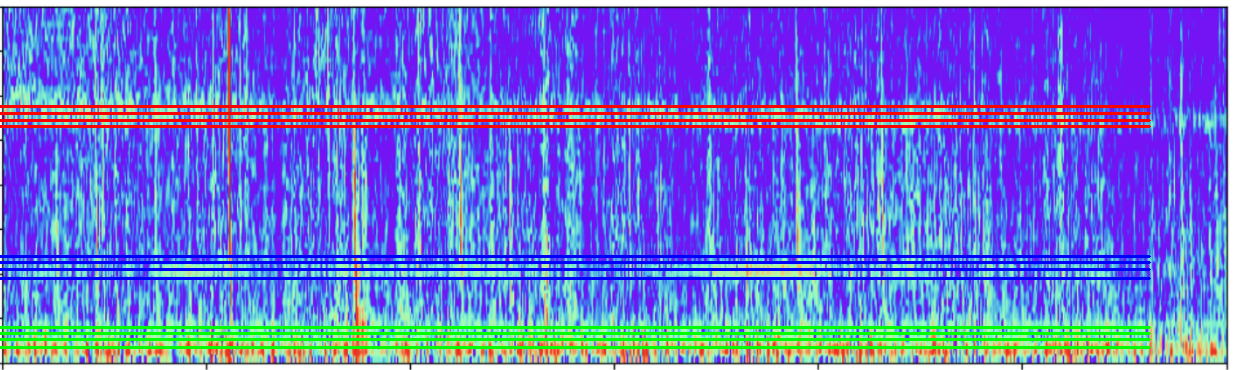

-1

In [ ]:

cv2_imshow(img)
cv2.waitKey(0)